<a href="https://colab.research.google.com/github/Madhu-95/EDA_CapstoneProjectOnAirBnBAnalysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_(By_MADHU_KUMARI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Airbnb?
Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

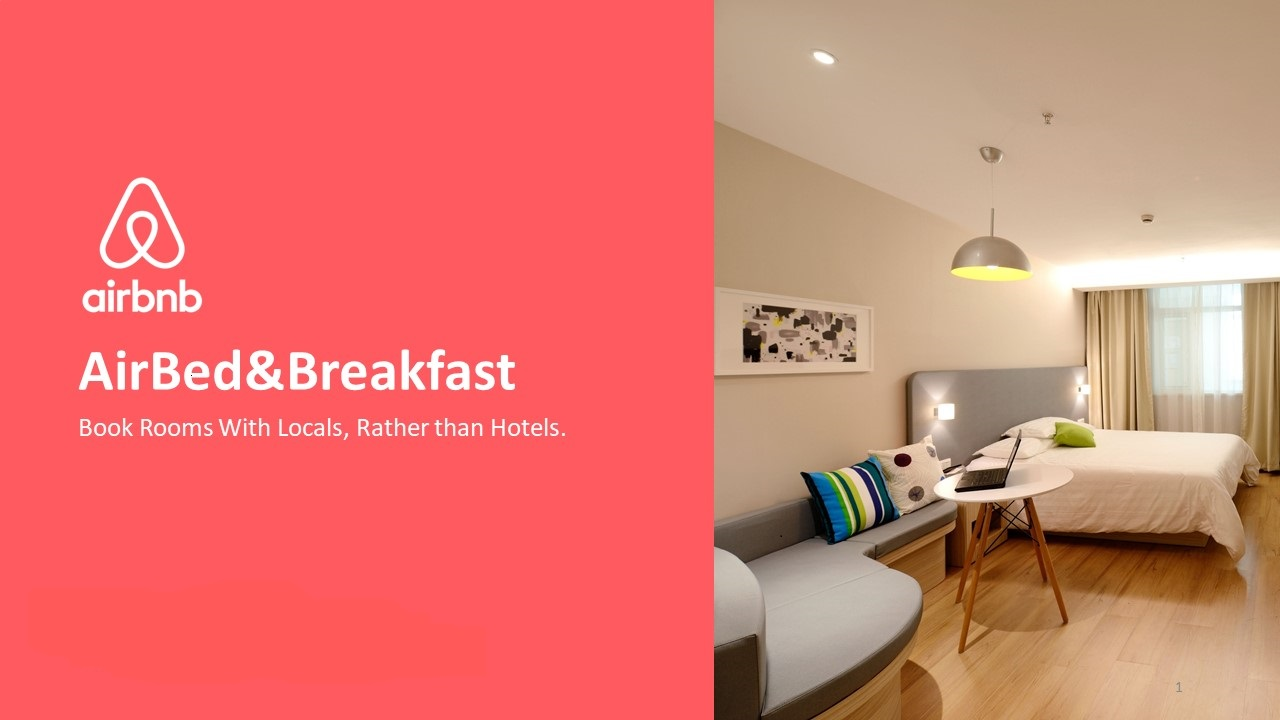

# **IMPORT LIBRARIES**

In [ ]:
#Import libraries first (These are the modules from outside the standard library and are required.)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# **MOUNT GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/'

# **IMPORT THE DATASET FROM THE DRIVE**

In [ ]:
#Let's import the dataset now(this contains the datset that we need to work on)
df = pd.read_csv(path + 'Airbnb NYC 2019.csv')
df.info()          #prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Data Profiling and Cleansing**

# Let’s get a summary of the dataset we have:

In [ ]:
df.describe()      #to view the basic statistical details that are a series of numeric values.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


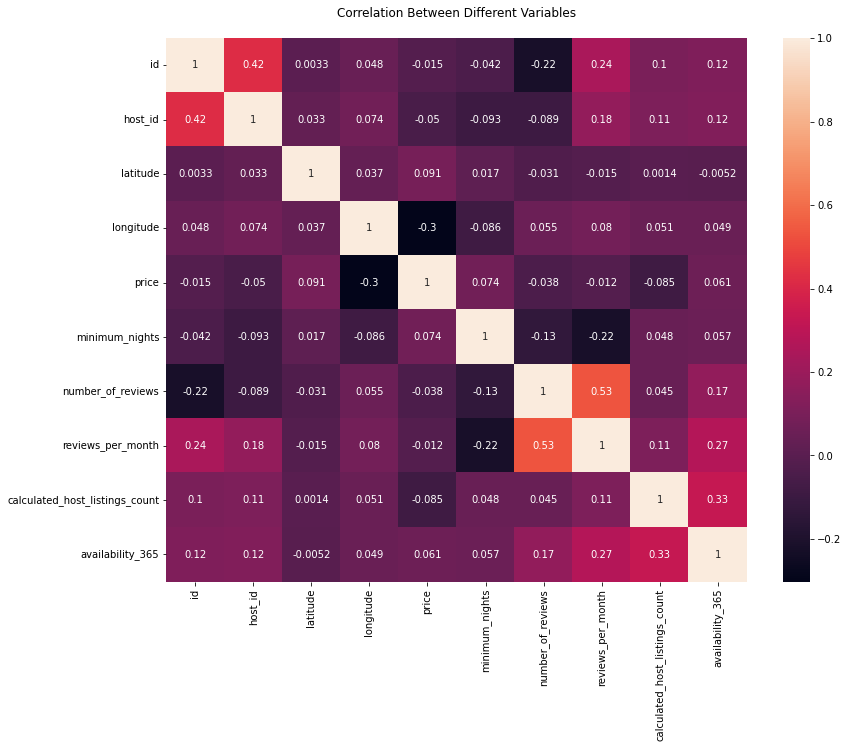

In [ ]:
#We need to see the correlation among the columns to understand the trend better
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()



**conclusion:**

From the graph above, we come to know that there is not a strong correlation except review_per_month and number_of_review.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Let's find the number of null values now
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**DROP SOME COLUMNS AT THIS STAGE WHICH DON'T SEEM MUCH OF USE**

In [ ]:
#We will update the dataset with the columns that are needed to answer the questions provided.
#Here, id, last_review and reviews_per_month are not required
updated_df = df[['host_id','host_name','neighbourhood_group','neighbourhood', 'latitude', 'longitude','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
updated_df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
updated_df.host_name.fillna('NaN', inplace=True)  #we'll fill the host_names(wherever absent), with NaN so that we're not left with null values
print(updated_df.isnull().any())

host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


**Now, we can see that there are no null values in the updated dataframe.**

In [ ]:
print(updated_df.shape)

(48895, 12)


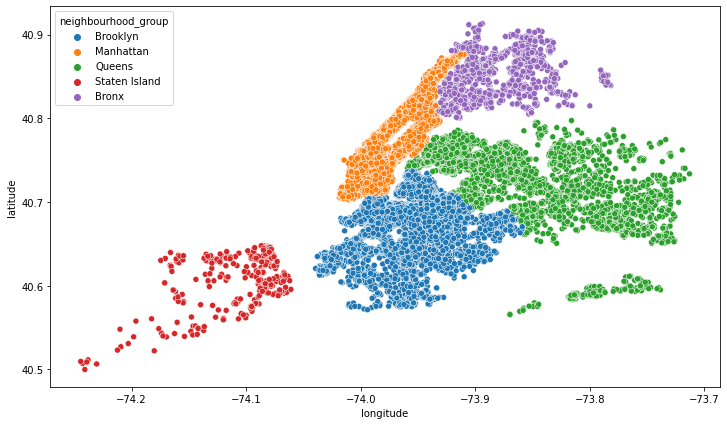

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = df, x = "longitude", y = "latitude", hue = "neighbourhood_group") #it shows the range in which the neighburhood groups are spread over

plt.show()

We can conclude that since all the neighbourhoods are from NYC, they're spread over a definite longitude and latitude.

# Let's move on to the questions now...

**Q1. What can we learn about different hosts and areas?**

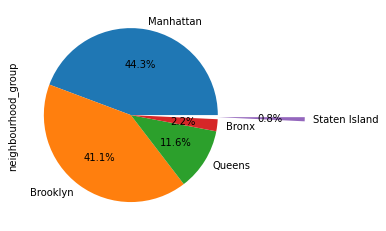

In [ ]:
#We'll plot a pie-chart that denotes the exact distribution and concentration of crowd in a particular neighbourhood.
a=df['neighbourhood_group'].value_counts().plot(kind='pie',autopct='%1.1f%%', explode=[0,0,0,0,1])
plt.rcParams['figure.figsize'] = (10,7)

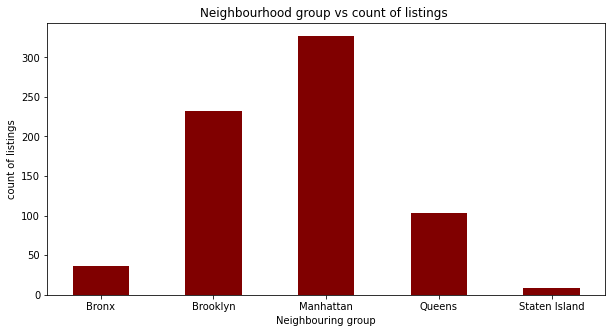

In [ ]:
neighbour_group = updated_df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].max().reset_index() #it will split the neighbourhood_groups on the basis of maximum listings
neighbouring_group = neighbour_group['neighbourhood_group']
count_of_istings = neighbour_group['calculated_host_listings_count']

#Let's do a bar plot now. It will help understand the trend better.
fig = plt.figure(figsize = (10, 5))

plt.bar(neighbouring_group, count_of_istings, color ='maroon', width = 0.5)
 
plt.xlabel("Neighbouring group")
plt.ylabel("count of listings")
plt.title("Neighbourhood group vs count of listings ")
plt.show()

**Conclusion from the graph:**

We can see that the neighbourhood group **Manhattan** has the most number of listings under its name.
It only provides the information about the neighbourhood groups, but we need to find the hosts as well hence, we'll have to find the host name as well and group all these three together.

In [ ]:
hosts_and_areas = updated_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index() #it will split the data into groups of neighbourhood group & host name based on maximum host listing coutns
hosts_and_areas.sort_values(by='calculated_host_listings_count', ascending=False).head() #sorts the host names and neighbourhood groups in descending order & prints the first 5 entries.


,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


**CONCLUSION:**

*Maximum listings are from neighbourhood group **Manhattan**  from the host **Sonder(NYC) followed by Blueground** and Blueground from Brooklyn.*




**Q2. What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
# We want to see whether greater price means greater reviews trend is followed here or not
price_area = updated_df.groupby(['price'])['number_of_reviews'].max().reset_index() #splitting on price w.r.t maximum reviews
print(price_area.head())

   price  number_of_reviews
0      0                 95
1     10                 93
2     11                113
3     12                  8
4     13                  9


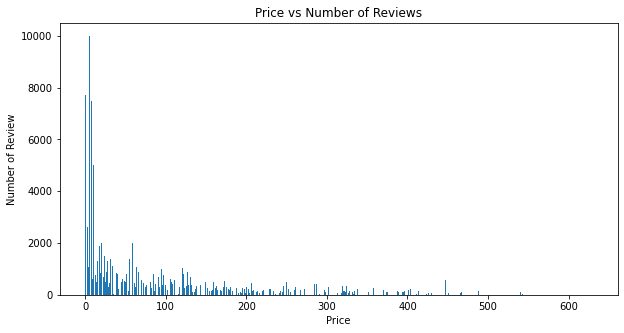

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
 
plt.bar(price, area)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

We can see that greater price doesn't generally mean greater reviews. It means people do not prefer the groups with highe prices.

In [ ]:
#Now we'll split the neighbourhood group on the basis of maximum reviews
neighboring_reviews = updated_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index() 
print(neighboring_reviews)

  neighbourhood_group  number_of_reviews
0               Bronx                321
1            Brooklyn                488
2           Manhattan                607
3              Queens                629
4       Staten Island                333


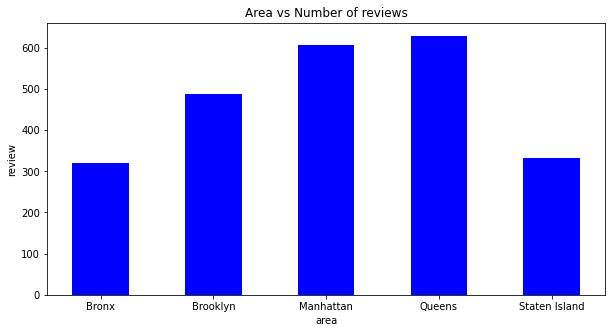

In [ ]:
area = neighboring_reviews['neighbourhood_group']
review = neighboring_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(area, review, color ='blue',
        width = 0.5)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

We can clearly see that **Queens** has maximum reviews followed by Manhattan and Brooklyn.

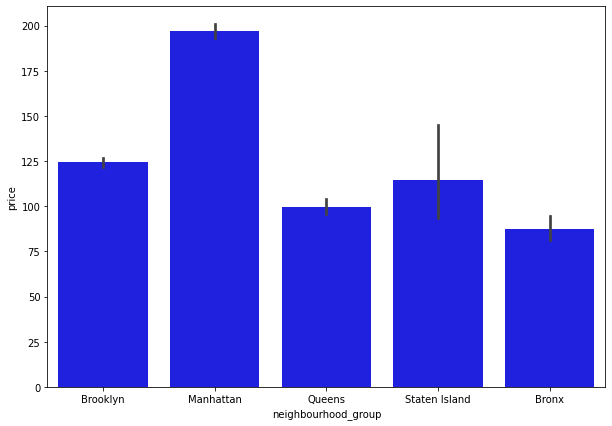

In [ ]:
#Splitting the neighbourhood group(location) on the basis of price range
sns.barplot(x="neighbourhood_group", y="price", data=df,
            label="neighbourhood price range ", color="b")

We can say that the price of **Manhattan is the maximum** while that of **Queens is the second lowest.**

*From the above Analysis we can say that most people prefer to stay at a place **where price is less and the ratings are high(reviews are great)** and in this case **Queens** is that neighbourhood area.*

**Q3.Which hosts are the busiest and why?**

In [ ]:
busiest_hosts = updated_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
print(busiest_hosts)

      host_name   host_id        room_type  number_of_reviews
10279      Dona  47621202     Private room                629
17708        Jj   4734398     Private room                607
25566      Maya  37312959     Private room                543
6235      Carol   2369681     Private room                540
8947   Danielle  26432133     Private room                510
3950        Asa  12949460  Entire home/apt                488
37766     Wanda    792159     Private room                480
22499     Linda   2680820     Private room                474
8625       Dani     42273  Entire home/apt                467
2942     Angela  23591164     Private room                466


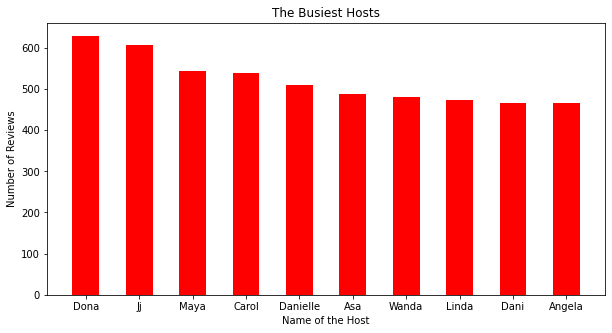

In [ ]:
name_of_hosts = busiest_hosts['host_name']
no_of_reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name_of_hosts, no_of_reviews, color ='red',
        width = 0.5)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("The Busiest Hosts")
plt.show()

**CONCLUSION:**

*The busiest hosts are:*
**Dona,**
**Jj,**
**Maya,**
**Carol** 
and
**Danielle.**

*The reason behind this can be : these people are the hosts to the room types: Entire home and Private room (which is preferred by most number of people.)*

*They have the maximum number of reviews which signifies that most number of people have been the customers to these hosts.*



**Q4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
#traffic (people's preference) can be analysed by the minimum nights they prefer to saty in the neighbourhood
#So, we'll split the neighbourhood group and room type on the basis of minimum nights they spend.
traffic_areas = updated_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
print(traffic_areas)

   neighbourhood_group        room_type  minimum_nights
6            Manhattan  Entire home/apt           13199
4             Brooklyn     Private room           10132
3             Brooklyn  Entire home/apt            9559
7            Manhattan     Private room            7982
10              Queens     Private room            3372
9               Queens  Entire home/apt            2096
1                Bronx     Private room             652
8            Manhattan      Shared room             480
5             Brooklyn      Shared room             413
0                Bronx  Entire home/apt             379
11              Queens      Shared room             198
13       Staten Island     Private room             188
12       Staten Island  Entire home/apt             176
2                Bronx      Shared room              60
14       Staten Island      Shared room               9


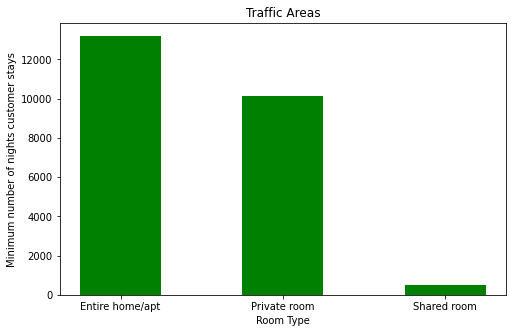

In [ ]:
room_type = traffic_areas['room_type']
nights_stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (8, 5))
 
# creating the bar plot
plt.bar(room_type, nights_stayed, color ='green',
        width = 0.5)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights customer stays")
plt.title("Traffic Areas")
plt.show()

*From the Above Analysis We can Say that, there is a drastic difference in traffic(number of occupants) based on room type. **People do not prefer to stay in shared rooms** in any of the neighbourhoods despite the facilities.*

 *They prefer **Entire home/apartment or Private room which is present in Manhattan, Brooklyn, Queens** and they prefer the listings which are less in price.*

**The Overall Conclusion:**
1. The people who prefer to stay in Entire home/Apartment stay for a long period of time in that particular Neighbourhood only hence, they can be thought of being staying with family or friends. More number of people are there, hence the entire home/ apartment has been booked.

2. The people who prefer to stay in Private room (probably businessmen) don't stay for longer as compared to those who prefer to stay in entire Home or Apartment.

3. A majority of people prefers to pay less price for the accommodation they're in and they settle for great reviews as well.
They follow a general cheap-and-best trend.

4. The more the number of Reviews for a particular Neighbourhood group, the more the chances of the group being a tourist place are there.

5. People not preferring to stay for more than a day can most probably be termed as travellers (probably on a business trip or for some sight-seeing purposes.)

6. No perks are enough for the people to stay in shared rooms (not even price, location, reviews). 

# **THANK YOU! :)**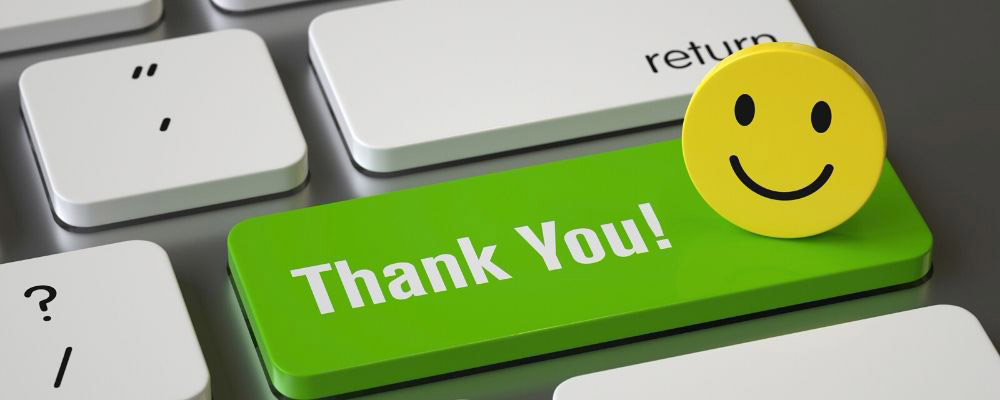